In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ace_project/

/content/drive/MyDrive/ace_project


In [ ]:
ls

aisles.csv          order_products_prior.csv  products.csv
departments.csv     order_products_train.csv
model_all_data.csv  orders.csv


In [ ]:
aisles = pd.read_csv('aisles.csv')
order_products_prior = pd.read_csv('order_products_prior.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
order_products_train = pd.read_csv('order_products_train.csv')
model_all_data = pd.read_csv('model_all_data.csv')
orders = pd.read_csv('orders.csv')

In [ ]:
print(aisles.shape)
print(departments.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(orders.shape)
print(products.shape)
print(model_all_data.shape)

(134, 2)
(21, 2)
(793924, 4)
(53704, 4)
(82683, 7)
(49688, 4)
(329806, 25)


In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,12,30597,1,1
1,12,15221,2,1
2,12,43772,3,1
3,12,37886,4,1
4,12,37215,5,0


In [ ]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1
3,1077,21137,4,1
4,1119,6046,1,1


In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow_x,order_hour_of_day_x,days_since_prior_order,unique_key,label,order_id,add_to_cart_order,reordered,order_dow_y,order_hour_of_day_y,product_total_orders,product_add_to_chart_order_mean,product_total_users,product_reordered_mean,product_most_dow,product_most_hod,product_days_since_prior_order_mean,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.000000,0.800000,6,13,85,4.2,23,0.729412,3,9,12.592593,5,2.000000,0.800000,6,13
1,112604,30597,15,3,10,1.0,112604_30597,0,5,3.800000,0.800000,0,10,85,4.2,23,0.729412,3,9,12.592593,5,3.800000,0.800000,0,10
2,75304,30597,28,2,8,12.0,75304_30597,0,2,29.000000,0.500000,2,8,85,4.2,23,0.729412,3,9,12.592593,2,29.000000,0.500000,2,8
3,22499,30597,20,4,9,30.0,22499_30597,1,18,2.722222,0.944444,2,9,85,4.2,23,0.729412,3,9,12.592593,18,2.722222,0.944444,2,9
4,190626,30597,11,1,9,14.0,190626_30597,0,9,2.111111,0.888889,1,9,85,4.2,23,0.729412,3,9,12.592593,9,2.111111,0.888889,1,9


# 2. Data Exploration

In [ ]:
prior_order_details = order_products_prior.merge(orders, on="order_id")

In [ ]:
# Covert dow to string for better visualization
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Monday" if x==1 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Friday" if x==5 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [ ]:
prior_order_details.head()
# 把order和product连在一起

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,Saturday,8,10.0
1,12,15221,2,1,152610,prior,22,Saturday,8,10.0
2,12,43772,3,1,152610,prior,22,Saturday,8,10.0
3,12,37886,4,1,152610,prior,22,Saturday,8,10.0
4,12,37215,5,0,152610,prior,22,Saturday,8,10.0


2.2 Visualize order frequency on DoW

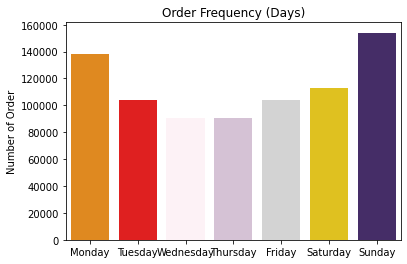

In [ ]:
#Frequency of Order Based on Days
ax = sns.countplot(palette=["#FF8C00","#FF0000", "#FFF0F5","#D8BFD8","#D3D3D3","#FFD700","#432371"], x="order_dow",data=prior_order_details,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Order Frequency (Days)")
plt.xlabel("")
plt.ylabel("Number of Order")
plt.show()
# 对prior_order_details的order_dow这一行做countplot来看frequency

1.3 Visualize order frequency on HoD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


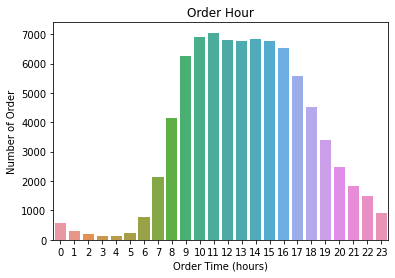

In [ ]:
order_hours_counts = orders.groupby("order_id")["order_hour_of_day"].mean().reset_index()
order_hod_stats = order_hours_counts.order_hour_of_day.value_counts()
sns.barplot(order_hod_stats.index, order_hod_stats.values)
plt.title("Order Hour")
plt.ylabel("Number of Order")
plt.xlabel('Order Time (hours)')
plt.show()

In [ ]:
orders.groupby("order_id")["order_hour_of_day"].mean().reset_index()
# 如果一个order有多个时间，但在这里是一对一

,order_id,order_hour_of_day
0,12,8
1,50,13
2,90,16
3,236,12
4,252,18
...,...,...
82678,3420895,19
82679,3420966,10
82680,3420996,9
82681,3421018,9


1.4 Reorder Pattern Analysis

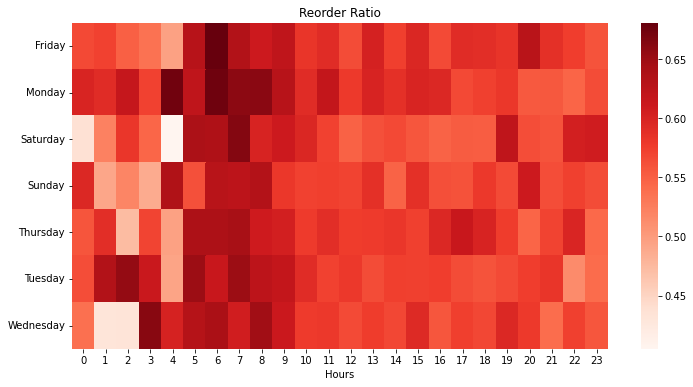

In [ ]:
reorder_heatmap = prior_order_details.groupby(["order_dow", "order_hour_of_day"])["reordered"].mean().reset_index()
# 某天(order_dow)的某一个时间(order_hour_of_day)有多少个reorder,例如周一上午八点会有很多order，所以我们要娶个平均

reorder_heatmap = reorder_heatmap.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(reorder_heatmap,cmap="Reds")
plt.title("Reorder Ratio")
plt.ylabel("")
plt.xlabel("Hours")
plt.show()

In [ ]:
reorder_heatmap

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
Friday,0.567251,0.572034,0.550388,0.535354,0.496183,0.630058,0.680883,0.634418,0.610677,0.622049,0.583440,0.591563,0.564845,0.602503,0.574965,0.596886,0.566166,0.592004,0.589528,0.584020,0.627149,0.587676,0.575840,0.560068
Monday,0.599442,0.591837,0.617251,0.572581,0.674641,0.622010,0.676249,0.660356,0.660913,0.630201,0.592208,0.618401,0.578831,0.600434,0.587335,0.599543,0.596117,0.567598,0.573962,0.580768,0.555831,0.555922,0.547170,0.565366
Saturday,0.438291,0.522852,0.582677,0.546099,0.404908,0.639640,0.637555,0.663746,0.600063,0.610521,0.597625,0.572716,0.548412,0.561253,0.566792,0.556966,0.548146,0.552816,0.551941,0.621935,0.563981,0.559144,0.604764,0.608067
Sunday,0.596118,0.492063,0.519417,0.487805,0.635659,0.561798,0.628070,0.625713,0.632673,0.580712,0.572443,0.574560,0.571301,0.587726,0.547221,0.587734,0.563119,0.560964,0.579957,0.565647,0.610511,0.563980,0.573087,0.565396
Thursday,0.558081,0.590258,0.472973,0.570136,0.496124,0.637821,0.638517,0.643494,0.609187,0.604442,0.577839,0.589761,0.577099,0.577824,0.582064,0.573727,0.595724,0.614588,0.601024,0.576763,0.546398,0.571263,0.598508,0.543887
Tuesday,0.564184,0.633690,0.655172,0.613333,0.494382,0.651709,0.614837,0.650794,0.625297,0.619295,0.591665,0.572914,0.580551,0.565432,0.574408,0.573125,0.575652,0.564880,0.559078,0.566420,0.575627,0.583224,0.514218,0.541526
Wednesday,0.538576,0.431373,0.433333,0.661616,0.601307,0.632353,0.640719,0.607026,0.647715,0.612631,0.578379,0.580474,0.566255,0.576986,0.567920,0.594027,0.556999,0.574547,0.568327,0.596164,0.578599,0.540113,0.573974,0.557210


# 2. Data Quality Check

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [ ]:
print("NaN count in days_since_prior_order column: ", orders[orders.days_since_prior_order.isnull()].shape[0])
# 看null value
print("order_number 1 count in orders table: ", orders[orders.order_number == 1].drop_duplicates().shape[0])
# 看有多少个order_number = 1的呢？
print("user_id count in orders table: ", orders.user_id.drop_duplicates().shape[0])
# 看这个order里有多少个user,从结果来看，我们每个user都保有他第一次order的个数

NaN count in days_since_prior_order column:  5000
order_number 1 count in orders table:  5000
user_id count in orders table:  5000


2.2.Validate Valid orders matching in the prior table

In [ ]:
# orders.csv里面，不同eval_set的orders个数：
orders.groupby(['eval_set'], as_index=False).agg(OrderedDict([('order_id','nunique')]))

,eval_set,order_id
0,prior,77683
1,train,5000


In [ ]:
# 验证：order_products_prior.csv 里面的 order_id 都在 orders.csv 里
print("order_id count in prior: ", order_products_prior['order_id'].nunique())
print("order_id from prior found in orders: ", order_products_prior[order_products_prior.order_id.isin(orders.order_id)].order_id.nunique())

order_id count in prior:  77683
order_id from prior found in orders:  77683


2.3. Validate orders matching in the train table

In [ ]:
# 验证: order_products_train.csv 里面的 order_id 都在 orders.csv 里
print("orders count in train: ", order_products_train['order_id'].nunique())
print("order_id from train found in orders: ", order_products_train[order_products_train.order_id.isin(orders.order_id)].order_id.nunique())

orders count in train:  5000
order_id from train found in orders:  5000


2.4. Validate the intersection between prior and train table

In [ ]:
# 验证：order_products_prior.csv 和 order_products_train.csv 里面的order_id没有交集
print("order_id intersection between prior and train: ", pd.merge(order_products_prior, order_products_train, on = ['order_id']).shape[0])
# prior和train里面的order_id都能在大order里被找到，其次他们两个没有overlap

order_id intersection between prior and train:  0


2.5. Validate the user_id matching in prior and train set

In [ ]:
# orders.csv里面，不同eval_set中user个数：
orders.groupby(['eval_set'], as_index=False).agg(OrderedDict([('user_id','nunique')]))
# 把这一列(eval_set)groupby，算一下user_id里互不相同的个数（nunique)，我们就发现在这里只有两种数据prior和train
# 先把数据groupby成两堆东西prior和train,然后计算这两堆里user_id互不相同的数据，as_index

In [ ]:
prior_user_ids = set(orders[orders['eval_set'] == 'prior']['user_id'])
train_user_ids = set(orders[orders['eval_set'] == 'train']['user_id'])
print("user_ids in prior: ", len(prior_user_ids))
print("user_ids in train: ", len(train_user_ids))
print("intersection of prior and train: ", len(prior_user_ids.intersection(train_user_ids)))

user_ids in prior:  5000
user_ids in train:  5000
intersection of prior and train:  5000


2.6. Validate order counts in the train dataset

In [ ]:
(orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'train']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','count')]))
  .rename(columns={'order_number':'order_counts'})).sort_values(by=['order_counts']).head()

,user_id,order_counts
0,50,1
3336,135881,1
3335,135743,1
3334,135718,1
3333,135687,1


2.7. Validate the relative order of `order_num` in prior and train dataset

In [ ]:
df_prior_order_max = (orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'prior']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','max')]))
  .rename(columns={'order_number':'prior_order_max'}))
# 在prior里看每一个人的order_number的最大值，然后rename
# 下面code里的train data里看order number的最小值，然后对于每一个人看max和min在prior和train里的关系

In [ ]:
df_train_order_min = (orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'train']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','min')]))
  .rename(columns={'order_number':'train_order_min'}))

In [ ]:
df_order_diff = pd.merge(df_prior_order_max, df_train_order_min, on = ['user_id'])
print("Rows count where prior_order_max >= train_order_min: ", 
      df_order_diff[df_order_diff.prior_order_max >= df_order_diff.train_order_min].shape[0])

Rows count where prior_order_max >= train_order_min:  0


#Construct Model Label

In [ ]:
train_details = order_products_train.merge(orders, on = 'order_id')
# 用train data join出来order id
train_user_ids = set(orders[orders['eval_set'] == 'train']['user_id'])
# 拿到train data里的所有user id
train_unique_key = train_details['user_id'].astype('str') + '_' + train_details['product_id'].astype('str')
# 构造一个key，把train data里的user id和product id整合起来，得到一些key

In [ ]:
prior_details = order_products_prior.merge(orders, on = 'order_id')

In [ ]:
model_all_data = prior_details[prior_details.user_id.isin(train_user_ids)][['user_id','product_id','order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
model_all_data = model_all_data.drop_duplicates(subset=['user_id', 'product_id']) #在model_all_data中，一个user对于一个product只应该有一行数据.
model_all_data['unique_key'] = model_all_data['user_id'].astype('str') + '_' + model_all_data['product_id'].astype('str')

In [ ]:
model_all_data['label'] = 0
model_all_data.loc[model_all_data.unique_key.isin(train_unique_key), 'label'] = 1

In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label
0,152610,30597,22,6,8,10.0,152610_30597,0
1,152610,15221,22,6,8,10.0,152610_15221,0
2,152610,43772,22,6,8,10.0,152610_43772,0
3,152610,37886,22,6,8,10.0,152610_37886,0
4,152610,37215,22,6,8,10.0,152610_37215,0


# Construct Model Features

In [ ]:
user_product_features = ['user_product__total_orders',
                         'user_product__add_to_cart_order_mean',
                         'user_product__reordered_mean',
                         'user_product__most_dow',
                         'user_product__most_hod']

In [ ]:
# 注意: 这个block的程序执行时间约为2mins
df_user_product_features = (prior_details.groupby(['product_id','user_id'],as_index=False) 
                                           .agg(OrderedDict(
                                                   [('order_id','count'), #该用户对该商品的购买次数
                                                    ('add_to_cart_order','mean'), # 该用户对该商品的加入购物车顺序 - 均值
                                                    ('reordered', 'mean'), #该用户对该商品的复购率
                                                    ('order_dow', (lambda x: x.mode()[0])), #该用户购买该商品，最多的dow
                                                    ('order_hour_of_day', (lambda x: x.mode()[0])), #该用户购买该商品，最多的 hod
                                                    ])))
df_user_product_features.columns = ['product_id', 'user_id'] + user_product_features

In [ ]:
model_all_data = model_all_data.merge(df_user_product_features, on = ['user_id', 'product_id'])

2.2. Feature Group 2: product features

In [ ]:
product_features = ['product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean'
                     ]

In [ ]:
df_product_features = (prior_details.groupby(['product_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'), # 该产品被所有用户购买的次数
                                                    ('add_to_cart_order','mean'), #该产品被所有用户添加到购物车的顺序 - 平均值
                                                    ('user_id', 'nunique'), # 所有购买该产品的人数
                                                    ('reordered', 'mean'), #该产品被所有用户复购的频率 (也可以加总和，方差)
                                                    ('order_dow', (lambda x: x.mode()[0])), #该产品被购买最多的dow #
                                                    ('order_hour_of_day', (lambda x: x.mode()[0])), #该产品被购买最多的dow
                                                    ('days_since_prior_order', 'mean') #该商品距离上次被购买的均值
                                                    ])))
df_product_features.columns = ['product_id'] + product_features

In [ ]:
model_all_data = model_all_data.merge(df_product_features, on = ['product_id'])

In [ ]:
model_all_data = model_all_data.merge(products[['product_id','aisle_id', 'department_id']], 
                                      on = ['product_id'])

In [ ]:
model_all_data.rename(columns={'aisle_id': 'product__aisle_id', 'department_id': 'product__department_id'}, inplace=True)

#2.3. Feature Group 3: user features

In [ ]:
user_features = ['user__order_count',
                  'user__product_count',
                  'user__days_since_prior_order_mean',
                  'user__reordered_mean',
                  'user__most_dow',
                  'user__most_hod',
                  ]

In [ ]:
df_user_features = (prior_details.groupby(['user_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'), # 该用户的总订单数
                                                    ('product_id','count'), #该用户购买的全部商品总数
                                                    ('days_since_prior_order','mean'), #该用户订单平均间隔时间
                                                    ('reordered', 'mean'), #该用户的总复购率
                                                    ('order_dow', (lambda x: x.mode()[0])), #该用户下单最多的dow
                                                    ('order_hour_of_day', (lambda x: x.mode()[0])), #该用户下单最多的dow
                                                    ])))
df_user_features.columns = ['user_id'] + user_features

In [ ]:
model_all_data = model_all_data.merge(df_user_features, on = ['user_id'])

In [ ]:
model_all_data['label'].value_counts()

0    297467
1     32339
Name: label, dtype: int64

In [ ]:
model_all_data.shape

(329806, 28)

# 3. Save feature data to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# Save the model_all_data dataframe as csv file to the file path we selected above.
model_all_data.to_csv('model_all_data.csv', index=False)

#**Part 3**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import keras
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

 _64A3747GB.jpg
 ace_project/
 ace_project2/
 bank.data
 bank.data.csv
'card (1).pdf'
'card (2).pdf'
 card.pdf
 ChatBot/
'churn example.ipynb'
'Colab Notebooks'/
'Critical Appraisal Table .docx'
'Data Manipulation in Python I.ipynb'
 fraudData/
 HR_comma_sep.csv
 IMG_1543.jpg
 listings.csv
'Logistic Regression评分卡.gdoc'
'Looking at Hypertension in Highbridge and Grand Concourse.docx'
 model_all_data.csv
 Narrativedata.csv
 Outlook/
 people.json
 Photoshop/
'SQL 3 table schema (1).gdoc'
'SQL 3 table schema.gdoc'
 telecom.churn.csv.all
 time_series_19-covid-Confirmed.csv
 TVdata.txt
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document (5).gdoc'
'Untitled document (6).gdoc'
'Untitled document.gdoc'
 Voucher-GYG6KALQHMGL.pdf
 watch_reviews.tsv
'Wave 1 Youth and Parent Data codebook.pdf'
'数据结构与算法 Python语言描述_s13946445-裘宗燕.pdf'
 机器学习_周志华.pdf


In [ ]:
model_all_data = pd.read_csv('model_all_data.csv')

In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod,product__total_orders,product__add_to_cart_order_mean,product__total_users,product__reordered_mean,product__most_dow,product__most_hod,product__days_since_prior_order_mean,product__aisle_id,product__department_id,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,0.800,6,13,85,4.200000,23,0.729412,3,9,12.592593,53,16,26,408,10.953804,0.375,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,0.875,4,9,30,7.033333,10,0.666667,6,12,13.653846,84,16,26,408,10.953804,0.375,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,0.500,5,8,508,9.096457,171,0.663386,1,12,12.008565,83,4,26,408,10.953804,0.375,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,0.500,6,8,49,11.204082,28,0.428571,0,14,11.489362,53,16,26,408,10.953804,0.375,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,0.000,6,8,165,8.278788,61,0.630303,1,13,11.490066,98,7,26,408,10.953804,0.375,6,12


In [ ]:
model_all_data.shape

(329806, 28)

In [ ]:
unique_key = ['user_id', 'product_id']
raw_features = ['order_number',
                     'order_dow',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'user_product__total_orders',
                     'user_product__add_to_cart_order_mean',
                     'user_product__reordered_mean',
                     'user_product__most_dow',
                     'user_product__most_hod',
                     'product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean',
                     'user__order_count',
                     'user__product_count',
                     'user__days_since_prior_order_mean',
                     'user__reordered_mean',
                     'user__most_dow',
                     'user__most_hod',
                     'product__aisle_id',
                     'product__department_id',
                     ]
label = ['label']

In [ ]:
len(raw_features)

24

In [ ]:
model_all_data = model_all_data[unique_key + raw_features + label]

In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod,product__total_orders,product__add_to_cart_order_mean,product__total_users,product__reordered_mean,product__most_dow,product__most_hod,product__days_since_prior_order_mean,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod,product__aisle_id,product__department_id,label
0,152610,30597,22,6,8,10.0,5,2.00,0.800,6,13,85,4.200000,23,0.729412,3,9,12.592593,26,408,10.953804,0.375,6,12,53,16,0
1,152610,15221,22,6,8,10.0,8,8.25,0.875,4,9,30,7.033333,10,0.666667,6,12,13.653846,26,408,10.953804,0.375,6,12,84,16,0
2,152610,43772,22,6,8,10.0,2,3.00,0.500,5,8,508,9.096457,171,0.663386,1,12,12.008565,26,408,10.953804,0.375,6,12,83,4,0
3,152610,37886,22,6,8,10.0,2,3.50,0.500,6,8,49,11.204082,28,0.428571,0,14,11.489362,26,408,10.953804,0.375,6,12,53,16,0
4,152610,37215,22,6,8,10.0,1,5.00,0.000,6,8,165,8.278788,61,0.630303,1,13,11.490066,26,408,10.953804,0.375,6,12,98,7,0


In [ ]:
model_all_data.shape

(329806, 27)

2.1. Label Ratio

In [ ]:
label_count = model_all_data.label.value_counts()
print("Negative label count: ", label_count[0])
print("Positive label count: ", label_count[1])
print("Positive label rate is {:.2f}%".format(
      label_count[1] / (label_count[0] + label_count[1]) * 100) )

Negative label count:  297467
Positive label count:  32339
Positive label rate is 9.81%


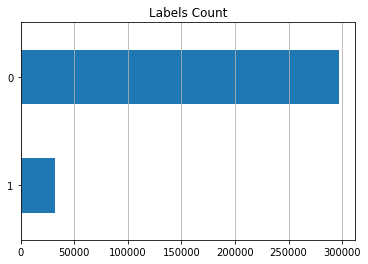

In [ ]:
ax = label_count.sort_values().plot(kind='barh', title='Labels Count')
ax.grid(axis="x")

Null value check

In [ ]:
model_all_data.isna().sum()

user_id                                     0
product_id                                  0
order_number                                0
order_dow                                   0
order_hour_of_day                           0
days_since_prior_order                  29995
user_product__total_orders                  0
user_product__add_to_cart_order_mean        0
user_product__reordered_mean                0
user_product__most_dow                      0
user_product__most_hod                      0
product__total_orders                       0
product__add_to_cart_order_mean             0
product__total_users                        0
product__reordered_mean                     0
product__most_dow                           0
product__most_hod                           0
product__days_since_prior_order_mean      726
user__order_count                           0
user__product_count                         0
user__days_since_prior_order_mean           0
user__reordered_mean              

 Categorical Feature Transformation

In [ ]:
# One-hot encoding for the `product__department_id` feature.
model_all_data = pd.concat(
    [model_all_data.drop('product__department_id',axis=1),
     pd.get_dummies(model_all_data["product__department_id"],
                    prefix='product__department_id_')],
                     axis=1)

# 3. Split Dataset to Train, Validation and Test

In [ ]:
# We randomly select 20% users as test data. 
# The remaining data will be used as train & validation data.
test_user_ids = model_all_data.user_id.drop_duplicates().sample(frac=0.2)

train_validation_data = model_all_data[~model_all_data.user_id.isin(test_user_ids)]
test_data = model_all_data[model_all_data.user_id.isin(test_user_ids)]

In [ ]:
model_all_data.shape

(329806, 47)

In [ ]:
train_validation_data.shape

(265177, 47)

In [ ]:
test_data.shape

(64629, 47)

Model Selection with All Features

In [ ]:
train_validation_data_x = train_validation_data.drop(['user_id', 'product_id', 'label'],axis=1)
train_validation_data_y = train_validation_data['label']

In [ ]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ]

In [ ]:
def build_ml_pipeline(classifier):
  steps = list()
  steps.append(('fillnan', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)))
  steps.append(('downSample', RandomUnderSampler()))
  steps.append(('scaler', MinMaxScaler()))
  steps.append(('model', classifier))
  pipeline = Pipeline(steps=steps)
  return pipeline

In [ ]:
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')

CPU times: user 9.43 s, sys: 4.22 s, total: 13.6 s
Wall time: 7.88 s
LogisticRegression : F1 value is 34.749 (2.520)
CPU times: user 6.57 s, sys: 133 ms, total: 6.7 s
Wall time: 6.61 s
DecisionTreeClassifier : F1 value is 24.519 (1.324)
CPU times: user 1min, sys: 255 ms, total: 1min
Wall time: 1min
RandomForestClassifier : F1 value is 33.874 (2.913)
CPU times: user 27.7 s, sys: 176 ms, total: 27.9 s
Wall time: 27.8 s
AdaBoostClassifier : F1 value is 34.301 (3.455)
CPU times: user 1min 37s, sys: 61.4 ms, total: 1min 37s
Wall time: 1min 37s
GradientBoostingClassifier : F1 value is 35.208 (3.140)


Feature Selection

In [ ]:
pipeline = build_ml_pipeline(GradientBoostingClassifier())
pipeline.fit(train_validation_data_x, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

In [ ]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x.columns.tolist()

In [ ]:
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
top15_features = df_importances.head(15) 

In [ ]:
# Only use the selected top 15 features in our training data.
train_validation_data_x_select_features = train_validation_data_x[top15_features['feature']]

In [ ]:
top15_features

,feature,importance
6,user_product__reordered_mean,0.318186
16,user__order_count,0.285028
4,user_product__total_orders,0.203564
0,order_number,0.072493
12,product__reordered_mean,0.066060
19,user__reordered_mean,0.018352
9,product__total_orders,0.008543
3,days_since_prior_order,0.006543
17,user__product_count,0.005235
18,user__days_since_prior_order_mean,0.004050


Train Neural Network Model


In [ ]:
def create_model():
    model = keras.Sequential([
        ### layer input
        keras.layers.Dense(30, input_dim=15, activation='relu'),
        ###  layer 1
        keras.layers.Dense(15, activation='relu'),
        ###  layer 2
        keras.layers.Dense(5, activation='relu'),
        ### layer output
        keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [ ]:
# wrap the model using the function you created
NN_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=32, verbose=0)

In [ ]:
keras_model = create_model()

In [ ]:
print(keras_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                480       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________
None


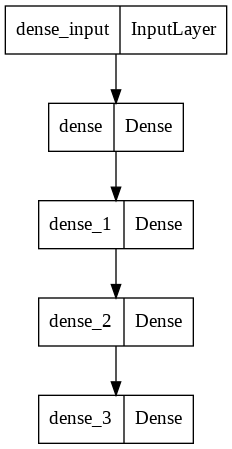

In [ ]:
plot_model(keras_model)

Model Selection with Selected Top 15 Features including Neural Network Model

In [ ]:
# Add our neural network model to our classifiers list.
classifiers.append(NN_model)

In [ ]:
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x_select_features, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')

CPU times: user 5.13 s, sys: 3.3 s, total: 8.43 s
Wall time: 4.76 s
LogisticRegression : F1 value is 34.817 (2.464)
CPU times: user 4.02 s, sys: 104 ms, total: 4.12 s
Wall time: 4.09 s
DecisionTreeClassifier : F1 value is 24.728 (1.390)
CPU times: user 51.8 s, sys: 248 ms, total: 52.1 s
Wall time: 51.9 s
RandomForestClassifier : F1 value is 33.749 (3.070)
CPU times: user 17.3 s, sys: 175 ms, total: 17.5 s
Wall time: 17.4 s
AdaBoostClassifier : F1 value is 34.324 (3.182)
CPU times: user 59.4 s, sys: 124 ms, total: 59.5 s
Wall time: 59.2 s
GradientBoostingClassifier : F1 value is 35.225 (3.221)
CPU times: user 13min 20s, sys: 1min 6s, total: 14min 27s
Wall time: 11min 45s
KerasClassifier : F1 value is 35.661 (1.694)


# Hyper-parameter tuning for GradientBoostingClassifier

In [ ]:
sample_user_ids = train_validation_data.user_id.drop_duplicates().sample(frac=0.05)
train_validation_data_sample = train_validation_data[train_validation_data.user_id.isin(sample_user_ids)]

In [ ]:
train_validation_data_sample_x = train_validation_data_sample.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
train_validation_data_sample_y = train_validation_data_sample['label']

In [ ]:
param_grid = {
    'model__n_estimators': [100,150],
    'model__max_depth': [4,6],
    'model__min_samples_split': [2,4,6],
    'model__learning_rate': [0.005, 0.01],
}

In [ ]:
grid = GridSearchCV(build_ml_pipeline(GradientBoostingClassifier()), cv=5, param_grid=param_grid, scoring='f1')
grid.fit(train_validation_data_sample_x, train_validation_data_sample_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fillnan',
                                        SimpleImputer(fill_value=0.0,
                                                      strategy='constant')),
                                       ('downSample', RandomUnderSampler()),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.005, 0.01],
                         'model__max_depth': [4, 6],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 150]},
             scoring='f1')

In [ ]:
print("Best F1 value is %.3f" % grid.best_score_)
print("Params are %s" % grid.best_params_)

Best F1 value is 0.308
Params are {'model__learning_rate': 0.005, 'model__max_depth': 4, 'model__min_samples_split': 6, 'model__n_estimators': 100}


# 7. Train the final GradientBoostingClassifier

In [ ]:
pipeline = build_ml_pipeline(GradientBoostingClassifier(
    n_estimators=100,
    min_samples_split=2,
    max_depth=4,
    learning_rate=0.005,
))

pipeline.fit(train_validation_data_x_select_features, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.005, max_depth=4))])

In [ ]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x_select_features.columns.tolist()
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
df_importances.head(15)

,feature,importance
0,user_product__reordered_mean,0.318601
2,user_product__total_orders,0.310770
1,user__order_count,0.307439
4,product__reordered_mean,0.032760
3,order_number,0.027937
6,product__total_orders,0.001460
9,user__days_since_prior_order_mean,0.000753
7,days_since_prior_order,0.000233
13,product__total_users,0.000048
5,user__reordered_mean,0.000000


 Analyze top features in the final model

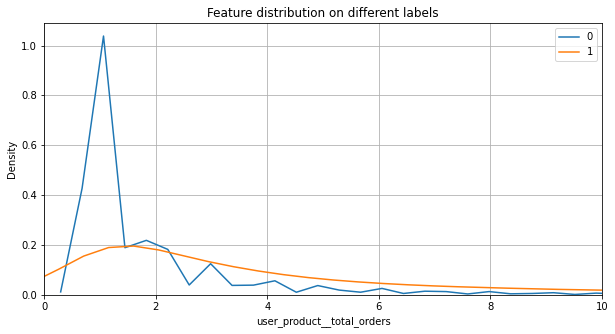

In [ ]:
feature_name = 'user_product__total_orders'
fig, ax = plt.subplots(nrows=1, ncols=1,  sharex=False, sharey=False, figsize=(10,5))
ax.title.set_text('Feature distribution on different labels')
plt.xlim([0,10])
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=ax)
ax.grid(True)
plt.legend()
plt.show()

#Evaluate model on Test Data

redict product reorder on Test Data

In [ ]:
test_data_x_selected_features = test_data.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
test_data_y = test_data['label']

In [ ]:
predict_y = pipeline.predict(test_data_x_selected_features)

In [ ]:
df_output = pd.DataFrame(
    {"user_id":test_data.user_id, "product_id":test_data.product_id, "predict":predict_y, "label":test_data.label})   

In [ ]:
df_output.head()

,user_id,product_id,predict,label
1762,178540,30597,0,0
1763,178540,16797,1,0
1764,178540,24852,1,1
1765,178540,28204,1,0
1766,178540,4920,0,0


In [ ]:
predict_y_prob = pipeline.predict_proba(test_data_x_selected_features)[:,1]

Analyze classification result

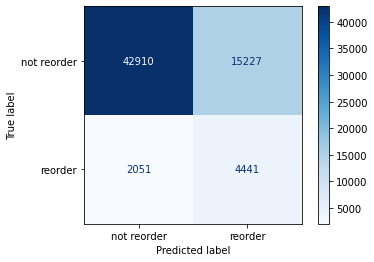

In [ ]:
plot_confusion_matrix(pipeline, test_data_x_selected_features, test_data_y,
                      display_labels=["not reorder","reorder"],cmap=plt.cm.Blues)

In [ ]:
acc = accuracy_score(test_data_y, predict_y)
f1 = f1_score(test_data_y, predict_y)
pre = precision_score(test_data_y, predict_y)
rec = recall_score(test_data_y, predict_y)
auc = roc_auc_score(test_data_y, predict_y_prob)

In [ ]:
print("Model evaluation result on test data: ")
print("F1 Score : {:.4%}".format(f1))
print("ROC AUC : {:.4%}".format(auc))
print("Accuracy : {:.4%}".format(acc))
print("Precision : {:.4%}".format(pre))
print("Recall : {:.4%}".format(rec))

Model evaluation result on test data: 
F1 Score : 33.9526%
ROC AUC : 78.5496%
Accuracy : 73.2659%
Precision : 22.5798%
Recall : 68.4073%
